Kroneker

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def matricesAuxiliales(matriz):
    filas, columnas = matriz.shape

    #inicializar matrices auxilialres
    matrizAuxiliarA = np.zeros((filas, columnas**2))
    matrizAuxiliarB = np.zeros((filas, columnas**2))

    inicioA = 0
    indicesB = np.arange(0, columnas**2, columnas)
    for i in range(columnas):
        matrizAuxiliarA[: ,inicioA:(columnas)*(i + 1)] = matriz

        matrizAuxiliarB[:, indicesB] = matriz

        inicioA = inicioA + columnas

        indicesB = indicesB + 1



    return matrizAuxiliarA , matrizAuxiliarB

In [ ]:
def calcularIndices(matrizA, matrizB):
    # matriz de indices
    filas, columnas = matrizA.shape


    # calculo de kronecker (revisar optimizacion para calcular solo filas necesarias)
    kronecker = np.kron(matrizA, matrizB)
    filasKronecker, columnasKronecker = kronecker.shape

    # filtrado de filas y columnas
    filasIncluidas = np.linspace(0, filasKronecker - 1, filas, dtype = np.int16) # filas a incluir
    columnasBorradas = np.linspace(0, columnasKronecker - 1, columnas, dtype = np.int16) # columnas a borrar

    columnasIndices = columnas**2 - len(columnasBorradas)

    indices = np.zeros((filas, columnasIndices))
    indices = np.delete(kronecker, columnasBorradas, axis = 1)[filasIncluidas, :]

    return indices

In [ ]:
def calcularIndicesMovilesNoMoviles(matrizA, matrizB):
    kronecker = np.kron(matrizA, matrizB)
    filas, columnas = matrizB.shape
    filasKronecker, columnasKronecker = kronecker.shape

    # filtrado de filas y columnas
    filasIncluidas = np.linspace(0, filasKronecker - 1, filas, dtype = np.int16) # filas a incluir
    indices = kronecker[filasIncluidas, :]
    return indices

In [ ]:
def nombresRelaciones(nutrientes):
    relaciones = []
    for i in nutrientes:
        for j in nutrientes:
            if i == j:
                pass
            else:
                relaciones = relaciones + ["{0}:{1}".format(i, j)]
    return relaciones

In [ ]:
def nombresRelacionesMovilesNoMoviles(moviles, noMoviles):
    relaciones = []
    numRelaciones = len(moviles)*len(noMoviles)
    for i in moviles:
        for j in noMoviles:
            relaciones = relaciones + ["{0}:{1}".format(i, j)]
    return relaciones

## dataframe prueba

In [ ]:
carpeta_principal = "/content/drive/MyDrive/proyecto de grado/datosPrueba"
os.listdir(carpeta_principal)

['muestra_so_213.csv',
 'Foliar_Pr_SO.csv',
 'Foliar_Pr_U.xlsx',
 'Foliar_Pr_U.csv']

In [ ]:
nutrientes = ["N", "P", "S", "Ca", "Mg", "K", "Fe", "Mn",	"Cu", "Zn",	"B"]
ruta_uraba = carpeta_principal + '/Foliar_Pr_U.csv'
df_uraba = pd.read_csv(ruta_uraba , delimiter = ',')
df_uraba.head()

,Mpio,Id,Pr,N,P,S,Ca,Mg,K,Fe,Mn,Cu,Zn,B
0,Arboletes,112,7.28,2.68,0.24,0.10,0.99,0.39,4.16,102,189,7,19,35
1,Arboletes,113,13.18,2.90,0.24,0.16,0.66,0.41,3.32,92,206,9,18,18
2,Arboletes,114,9.49,2.62,0.23,0.18,0.70,0.42,3.73,82,143,9,19,38
3,Mutatá,121,5.49,2.55,0.16,0.16,0.51,0.38,3.66,78,496,7,21,34
4,Mutatá,122,5.08,2.22,0.20,0.13,0.62,0.38,3.39,89,410,8,18,23


## relaciones moviles

In [ ]:
nutrientes_moviles = ["N","P","K","Mg","S"]
relaciones_moviles = nombresRelaciones(nutrientes_moviles) #20
df_uraba_moviles = df_uraba[nutrientes_moviles]
indices_uraba_moviles = pd.DataFrame(calcularIndices(df_uraba_moviles, 1/df_uraba_moviles), columns = relaciones_moviles)

In [ ]:
indices_uraba_moviles.head()

,N:P,N:K,N:Mg,N:S,P:N,P:K,P:Mg,P:S,K:N,K:P,K:Mg,K:S,Mg:N,Mg:P,Mg:K,Mg:S,S:N,S:P,S:K,S:Mg
0,11.166667,0.644231,6.871795,26.800000,0.089552,0.057692,0.615385,2.400000,1.552239,17.333333,10.666667,41.600000,0.145522,1.625000,0.093750,3.900000,0.037313,0.416667,0.024038,0.256410
1,12.083333,0.873494,7.073171,18.125000,0.082759,0.072289,0.585366,1.500000,1.144828,13.833333,8.097561,20.750000,0.141379,1.708333,0.123494,2.562500,0.055172,0.666667,0.048193,0.390244
2,11.391304,0.702413,6.238095,14.555556,0.087786,0.061662,0.547619,1.277778,1.423664,16.217391,8.880952,20.722222,0.160305,1.826087,0.112601,2.333333,0.068702,0.782609,0.048257,0.428571
3,15.937500,0.696721,6.710526,15.937500,0.062745,0.043716,0.421053,1.000000,1.435294,22.875000,9.631579,22.875000,0.149020,2.375000,0.103825,2.375000,0.062745,1.000000,0.043716,0.421053
4,11.100000,0.654867,5.842105,17.076923,0.090090,0.058997,0.526316,1.538462,1.527027,16.950000,8.921053,26.076923,0.171171,1.900000,0.112094,2.923077,0.058559,0.650000,0.038348,0.342105


## relaciones no moviles

In [ ]:
nutrientes_no_moviles = ["Ca","Fe","Mn","Cu","Zn","B"]
df_uraba_no_moviles = df_uraba[nutrientes_no_moviles]
relaciones_no_moviles = nombresRelaciones(nutrientes_no_moviles) #30
indices_uraba_no_moviles = pd.DataFrame(calcularIndices(df_uraba_no_moviles, 1/df_uraba_no_moviles), columns = relaciones_no_moviles)

In [ ]:
indices_uraba_no_moviles.head()

,Ca:Fe,Ca:Mn,Ca:Cu,Ca:Zn,Ca:B,Fe:Ca,Fe:Mn,Fe:Cu,Fe:Zn,Fe:B,...,Zn:Ca,Zn:Fe,Zn:Mn,Zn:Cu,Zn:B,B:Ca,B:Fe,B:Mn,B:Cu,B:Zn
0,0.009706,0.005238,0.141429,0.052105,0.028286,103.030303,0.539683,14.571429,5.368421,2.914286,...,19.191919,0.186275,0.100529,2.714286,0.542857,35.353535,0.343137,0.185185,5.000000,1.842105
1,0.007174,0.003204,0.073333,0.036667,0.036667,139.393939,0.446602,10.222222,5.111111,5.111111,...,27.272727,0.195652,0.087379,2.000000,1.000000,27.272727,0.195652,0.087379,2.000000,1.000000
2,0.008537,0.004895,0.077778,0.036842,0.018421,117.142857,0.573427,9.111111,4.315789,2.157895,...,27.142857,0.231707,0.132867,2.111111,0.500000,54.285714,0.463415,0.265734,4.222222,2.000000
3,0.006538,0.001028,0.072857,0.024286,0.015000,152.941176,0.157258,11.142857,3.714286,2.294118,...,41.176471,0.269231,0.042339,3.000000,0.617647,66.666667,0.435897,0.068548,4.857143,1.619048
4,0.006966,0.001512,0.077500,0.034444,0.026957,143.548387,0.217073,11.125000,4.944444,3.869565,...,29.032258,0.202247,0.043902,2.250000,0.782609,37.096774,0.258427,0.056098,2.875000,1.277778


## relaciones moviles-no moviles

In [ ]:
relaciones_movil_noMovil = nombresRelacionesMovilesNoMoviles(nutrientes_moviles, nutrientes_no_moviles)
indices_movil_noMovil = pd.DataFrame(calcularIndicesMovilesNoMoviles(df_uraba_moviles, df_uraba_no_moviles), columns = relaciones_movil_noMovil)

In [ ]:
indices_movil_noMovil.head()

,N:Ca,N:Fe,N:Mn,N:Cu,N:Zn,N:B,P:Ca,P:Fe,P:Mn,P:Cu,...,Mg:Mn,Mg:Cu,Mg:Zn,Mg:B,S:Ca,S:Fe,S:Mn,S:Cu,S:Zn,S:B
0,2.6532,273.36,506.52,18.76,50.92,93.80,0.2376,24.48,45.36,1.68,...,73.71,2.73,7.41,13.65,0.0990,10.20,18.90,0.70,1.90,3.50
1,1.9140,266.80,597.40,26.10,52.20,52.20,0.1584,22.08,49.44,2.16,...,84.46,3.69,7.38,7.38,0.1056,14.72,32.96,1.44,2.88,2.88
2,1.8340,214.84,374.66,23.58,49.78,99.56,0.1610,18.86,32.89,2.07,...,60.06,3.78,7.98,15.96,0.1260,14.76,25.74,1.62,3.42,6.84
3,1.3005,198.90,1264.80,17.85,53.55,86.70,0.0816,12.48,79.36,1.12,...,188.48,2.66,7.98,12.92,0.0816,12.48,79.36,1.12,3.36,5.44
4,1.3764,197.58,910.20,17.76,39.96,51.06,0.1240,17.80,82.00,1.60,...,155.80,3.04,6.84,8.74,0.0806,11.57,53.30,1.04,2.34,2.99


## base de datos y quantiles

In [ ]:
proporcion = 0.78
df_relaciones = pd.concat([df_uraba, indices_uraba_moviles, indices_uraba_no_moviles, indices_movil_noMovil], axis=1)
quantil = df_relaciones["Pr"].quantile(proporcion)
df_alto_rendimiento = df_relaciones[df_relaciones["Pr"] >= quantil]
df_bajo_rendimiento = df_relaciones[df_relaciones["Pr"] <= quantil]

In [ ]:
df_alto_rendimiento

,Mpio,Id,Pr,N,P,S,Ca,Mg,K,Fe,...,Mg:Mn,Mg:Cu,Mg:Zn,Mg:B,S:Ca,S:Fe,S:Mn,S:Cu,S:Zn,S:B
1,Arboletes,113,13.18,2.90,0.24,0.16,0.66,0.41,3.32,92,...,84.46,3.69,7.38,7.38,0.1056,14.72,32.96,1.44,2.88,2.88
7,Necoclí,131,13.09,2.97,0.17,0.06,0.88,0.34,3.30,137,...,110.16,2.38,5.44,8.50,0.0528,8.22,19.44,0.42,0.96,1.50
12,San Juan,141,15.38,2.70,0.20,0.14,0.94,0.29,3.72,58,...,38.86,2.03,4.93,7.25,0.1316,8.12,18.76,0.98,2.38,3.50
14,San Juan,143,15.73,3.27,0.19,0.07,1.02,0.26,3.56,81,...,117.00,1.56,4.42,9.10,0.0714,5.67,31.50,0.42,1.19,2.45
19,San Pedro,154,11.70,3.72,0.19,0.13,0.79,0.43,3.11,86,...,84.71,4.30,7.74,13.76,0.1027,11.18,25.61,1.30,2.34,4.16
22,Turbo,163,20.50,2.14,0.13,0.12,0.51,0.29,3.80,78,...,35.38,2.03,7.83,3.77,0.0612,9.36,14.64,0.84,3.24,1.56


In [ ]:
relaciones = ['N:P', 'N:K', 'N:Mg', 'N:S', 'P:N', 'P:K', 'P:Mg', 'P:S',
       'K:N', 'K:P', 'K:Mg', 'K:S', 'Mg:N', 'Mg:P', 'Mg:K', 'Mg:S', 'S:N',
       'S:P', 'S:K', 'S:Mg', 'Ca:Fe', 'Ca:Mn', 'Ca:Cu', 'Ca:Zn', 'Ca:B',
       'Fe:Ca', 'Fe:Mn', 'Fe:Cu', 'Fe:Zn', 'Fe:B', 'Mn:Ca', 'Mn:Fe', 'Mn:Cu',
       'Mn:Zn', 'Mn:B', 'Cu:Ca', 'Cu:Fe', 'Cu:Mn', 'Cu:Zn', 'Cu:B', 'Zn:Ca',
       'Zn:Fe', 'Zn:Mn', 'Zn:Cu', 'Zn:B', 'B:Ca', 'B:Fe', 'B:Mn', 'B:Cu',
       'B:Zn', 'N:Ca', 'N:Fe', 'N:Mn', 'N:Cu', 'N:Zn', 'N:B', 'P:Ca', 'P:Fe',
       'P:Mn', 'P:Cu', 'P:Zn', 'P:B', 'K:Ca', 'K:Fe', 'K:Mn', 'K:Cu', 'K:Zn',
       'K:B', 'Mg:Ca', 'Mg:Fe', 'Mg:Mn', 'Mg:Cu', 'Mg:Zn', 'Mg:B', 'S:Ca',
       'S:Fe', 'S:Mn', 'S:Cu', 'S:Zn', 'S:B']

In [ ]:
nutrientes

['N', 'P', 'S', 'Ca', 'Mg', 'K', 'Fe', 'Mn', 'Cu', 'Zn', 'B']

80

## promedio y coeficiente de variacion

In [ ]:
df_relaciones_alto_rendimiento = df_alto_rendimiento[relaciones]
df_relaciones_bajo_rendimiento = df_bajo_rendimiento[relaciones]

filas, columnas = df_relaciones_alto_rendimiento.shape
# promedios
promedioAltoRendimiento = df_relaciones_alto_rendimiento.mean()
matrizPromedioAltoRendimiento = pd.DataFrame(np.ones((filas, columnas)), columns = relaciones)*promedioAltoRendimiento

promedioBajoRendimiento = df_relaciones_bajo_rendimiento.mean()
matrizPromedioBajoRendimiento = pd.DataFrame(np.ones((filas, columnas)), columns = relaciones)*promedioBajoRendimiento


filas, columnas = df_relaciones_bajo_rendimiento.shape
# coeficiente de variacion
coefVariacionAltoRendimiento = df_relaciones_alto_rendimiento.std()/promedioAltoRendimiento
matrizCoefVariacionAltoRendimiento = pd.DataFrame(np.ones((filas, columnas)), columns = relaciones)*coefVariacionAltoRendimiento

coefVariacionBajoRendimiento = df_relaciones_bajo_rendimiento.std()/np.abs(promedioBajoRendimiento)
matrizCoefVariacionBajoRendimiento = pd.DataFrame(np.ones((filas, columnas)), columns = relaciones)*coefVariacionBajoRendimiento

In [ ]:
promedioAltoRendimiento

N:P     16.050822
N:K      0.862857
N:Mg     8.954368
N:S     30.012286
P:N      0.064000
          ...    
S:Fe     9.545000
S:Mn    23.818333
S:Cu     0.900000
S:Zn     2.165000
S:B      2.675000
Length: 80, dtype: float64

In [ ]:
df_relaciones_bajo_rendimiento

,N:P,N:K,N:Mg,N:S,P:N,P:K,P:Mg,P:S,K:N,K:P,...,Mg:Mn,Mg:Cu,Mg:Zn,Mg:B,S:Ca,S:Fe,S:Mn,S:Cu,S:Zn,S:B
0,11.166667,0.644231,6.871795,26.800000,0.089552,0.057692,0.615385,2.400000,1.552239,17.333333,...,73.71,2.73,7.41,13.65,0.0990,10.20,18.90,0.70,1.90,3.50
2,11.391304,0.702413,6.238095,14.555556,0.087786,0.061662,0.547619,1.277778,1.423664,16.217391,...,60.06,3.78,7.98,15.96,0.1260,14.76,25.74,1.62,3.42,6.84
3,15.937500,0.696721,6.710526,15.937500,0.062745,0.043716,0.421053,1.000000,1.435294,22.875000,...,188.48,2.66,7.98,12.92,0.0816,12.48,79.36,1.12,3.36,5.44
4,11.100000,0.654867,5.842105,17.076923,0.090090,0.058997,0.526316,1.538462,1.527027,16.950000,...,155.80,3.04,6.84,8.74,0.0806,11.57,53.30,1.04,2.34,2.99
5,14.181818,0.990476,8.000000,22.285714,0.070513,0.069841,0.564103,1.571429,1.009615,14.318182,...,86.58,3.90,6.63,8.19,0.1148,13.44,31.08,1.40,2.38,2.94
6,19.823529,1.130872,8.023810,22.466667,0.050445,0.057047,0.404762,1.133333,0.884273,17.529412,...,108.36,3.78,6.72,9.66,0.1290,12.15,38.70,1.35,2.40,3.45
8,17.421053,0.897019,9.194444,27.583333,0.057402,0.051491,0.527778,1.583333,1.114804,19.421053,...,154.08,2.88,6.12,14.04,0.1044,11.28,51.36,0.96,2.04,4.68
9,21.000000,0.847981,10.818182,35.700000,0.047619,0.040380,0.515152,1.700000,1.179272,24.764706,...,167.97,1.98,6.27,8.58,0.0710,8.80,50.90,0.60,1.90,2.60
10,18.058824,0.825269,7.871795,34.111111,0.055375,0.045699,0.435897,1.888889,1.211726,21.882353,...,127.14,3.51,7.80,8.97,0.0900,20.79,29.34,0.81,1.80,2.07
11,16.941176,0.716418,8.228571,32.000000,0.059028,0.042289,0.485714,1.888889,1.395833,23.647059,...,88.90,2.10,6.30,10.50,0.0648,6.75,22.86,0.54,1.62,2.70


In [ ]:
df_relaciones_alto_rendimiento

,N:P,N:K,N:Mg,N:S,P:N,P:K,P:Mg,P:S,K:N,K:P,...,Mg:Mn,Mg:Cu,Mg:Zn,Mg:B,S:Ca,S:Fe,S:Mn,S:Cu,S:Zn,S:B
1,12.083333,0.873494,7.073171,18.125000,0.082759,0.072289,0.585366,1.500000,1.144828,13.833333,...,84.46,3.69,7.38,7.38,0.1056,14.72,32.96,1.44,2.88,2.88
7,17.470588,0.900000,8.735294,49.500000,0.057239,0.051515,0.500000,2.833333,1.111111,19.411765,...,110.16,2.38,5.44,8.50,0.0528,8.22,19.44,0.42,0.96,1.50
12,13.500000,0.725806,9.310345,19.285714,0.074074,0.053763,0.689655,1.428571,1.377778,18.600000,...,38.86,2.03,4.93,7.25,0.1316,8.12,18.76,0.98,2.38,3.50
14,17.210526,0.918539,12.576923,46.714286,0.058104,0.053371,0.730769,2.714286,1.088685,18.736842,...,117.00,1.56,4.42,9.10,0.0714,5.67,31.50,0.42,1.19,2.45
19,19.578947,1.196141,8.651163,28.615385,0.051075,0.061093,0.441860,1.461538,0.836022,16.368421,...,84.71,4.30,7.74,13.76,0.1027,11.18,25.61,1.30,2.34,4.16
22,16.461538,0.563158,7.379310,17.833333,0.060748,0.034211,0.448276,1.083333,1.775701,29.230769,...,35.38,2.03,7.83,3.77,0.0612,9.36,14.64,0.84,3.24,1.56


## funciones

In [ ]:
# funcion parcial 1
comparacion1 = (df_relaciones_alto_rendimiento.reset_index(drop=True) >= matrizPromedioAltoRendimiento)
razonRelacionPromedio1 = (df_relaciones_alto_rendimiento/promedioAltoRendimiento - 1).reset_index(drop=True)

funcionAltoRendimiento1 = comparacion1*razonRelacionPromedio1/matrizCoefVariacionAltoRendimiento

# funcion parcial 2
comparacion2 = (df_relaciones_alto_rendimiento.reset_index(drop=True) < matrizPromedioAltoRendimiento)
razonRelacionPromedio2 = (1 - promedioAltoRendimiento/df_relaciones_alto_rendimiento).reset_index(drop=True)

funcionAltoRendimiento2 = comparacion2*razonRelacionPromedio2/matrizCoefVariacionAltoRendimiento

# funcion total
funcionAltoRendimiento = funcionAltoRendimiento1 + funcionAltoRendimiento2

In [ ]:
funcionAltoRendimiento2

,N:P,N:K,N:Mg,N:S,P:N,P:K,P:Mg,P:S,K:N,K:P,...,Mg:Mn,Mg:Cu,Mg:Zn,Mg:B,S:Ca,S:Fe,S:Mn,S:Cu,S:Zn,S:B
0,-1.906072,0.000000,-1.208747,-1.348460,0.000000,0.000000,0.000000,-0.556027,-0.257708,-1.474041,...,0.000000,0.000000,0.000000,-0.315361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,-0.113980,0.000000,-0.633702,-0.241225,-0.604122,0.000000,-0.381007,0.000000,...,0.000000,-0.295475,-0.641630,0.000000,-1.887739,-0.495081,-0.723621,-2.394748,-2.984185,-1.979567
2,-1.096874,-0.769294,0.000000,-1.143559,0.000000,-0.049346,0.000000,-0.707630,0.000000,-0.151358,...,-2.307353,-0.771846,-1.132808,-0.366708,0.000000,-0.539003,-0.866310,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,-0.544404,-0.081692,0.000000,0.000000,-0.467247,-0.123323,...,0.000000,-1.747796,-1.737336,0.000000,-0.648777,-2.099042,0.000000,-2.394748,-1.947904,-0.232081
4,0.000000,0.000000,-0.159286,-0.100369,-1.357650,0.000000,-1.285919,-0.635818,-1.758579,-0.674685,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,-2.168146,-0.970054,-1.404141,-0.287224,-2.562178,-1.202005,-1.722208,0.000000,0.000000,...,-2.757196,-0.771846,0.000000,-3.057403,-1.234953,-0.060706,-2.014287,-0.149672,0.000000,-1.806234
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
funcionAltoRendimiento1.head(5)

,N:P,N:K,N:Mg,N:S,P:N,P:K,P:Mg,P:S,K:N,K:P,...,Mg:Mn,Mg:Cu,Mg:Zn,Mg:B,S:Ca,S:Fe,S:Mn,S:Cu,S:Zn,S:B
0,-0.000000,0.050227,-0.000000,-0.000000,1.572577,1.432347,0.156724,-0.000000,-0.000000,-0.000000,...,0.174274,0.949029,0.711607,-0.000000,0.591347,1.665202,1.233141,1.257243,0.785160,0.193666
1,0.513488,0.175379,-0.000000,1.335042,-0.000000,-0.000000,-0.000000,1.343257,-0.000000,0.009186,...,0.916830,-0.000000,-0.000000,0.063500,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2,-0.000000,-0.000000,0.180677,-0.000000,0.844541,-0.000000,1.000183,-0.000000,0.483881,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,1.443148,-0.000000,-0.000000,0.186258,0.236097,0.779388
3,0.419431,0.262916,1.838635,1.144202,-0.000000,-0.000000,1.332701,1.182782,-0.000000,-0.000000,...,1.114460,-0.000000,-0.000000,0.247857,-0.000000,-0.000000,1.036198,-0.000000,-0.000000,-0.000000
4,1.276019,1.573660,-0.000000,-0.000000,-0.000000,0.537229,-0.000000,-0.000000,-0.000000,-0.000000,...,0.181498,1.513818,0.946633,1.679689,0.496338,0.526107,0.241682,0.931291,0.192172,1.402899


In [ ]:
funcionAltoRendimiento

,N:P,N:K,N:Mg,N:S,P:N,P:K,P:Mg,P:S,K:N,K:P,...,Mg:Mn,Mg:Cu,Mg:Zn,Mg:B,S:Ca,S:Fe,S:Mn,S:Cu,S:Zn,S:B
0,-1.906072,0.050227,-1.208747,-1.348460,1.572577,1.432347,0.156724,-0.556027,-0.257708,-1.474041,...,0.174274,0.949029,0.711607,-0.315361,0.591347,1.665202,1.233141,1.257243,0.785160,0.193666
1,0.513488,0.175379,-0.113980,1.335042,-0.633702,-0.241225,-0.604122,1.343257,-0.381007,0.009186,...,0.916830,-0.295475,-0.641630,0.063500,-1.887739,-0.495081,-0.723621,-2.394748,-2.984185,-1.979567
2,-1.096874,-0.769294,0.180677,-1.143559,0.844541,-0.049346,1.000183,-0.707630,0.483881,-0.151358,...,-2.307353,-0.771846,-1.132808,-0.366708,1.443148,-0.539003,-0.866310,0.186258,0.236097,0.779388
3,0.419431,0.262916,1.838635,1.144202,-0.544404,-0.081692,1.332701,1.182782,-0.467247,-0.123323,...,1.114460,-1.747796,-1.737336,0.247857,-0.648777,-2.099042,1.036198,-2.394748,-1.947904,-0.232081
4,1.276019,1.573660,-0.159286,-0.100369,-1.357650,0.537229,-1.285919,-0.635818,-1.758579,-0.674685,...,0.181498,1.513818,0.946633,1.679689,0.496338,0.526107,0.241682,0.931291,0.192172,1.402899
5,0.148544,-2.168146,-0.970054,-1.404141,-0.287224,-2.562178,-1.202005,-1.722208,1.722736,1.878919,...,-2.757196,-0.771846,1.005390,-3.057403,-1.234953,-0.060706,-2.014287,-0.149672,1.180485,-1.806234
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nutrientesRegex = [nutriente + ":" for nutriente in nutrientes]




apariciones = len(nutrientes)*[0]
cantidadRelacionesNutriente = dict(zip(nutrientes, apariciones))
for nutriente in nutrientes:
    for relacion in relaciones:
        if relacion.startswith(nutriente):
            cantidadRelacionesNutriente[nutriente] = cantidadRelacionesNutriente[nutriente] + 1


for i in range(len(nutrientes)):
    df_indices[nutrientes[i]] = funcionAltoRendimiento.filter(regex = nutrientesRegex[i]).sum(axis=1)/cantidadRelacionesNutriente[nutrientes[i]]

In [ ]:
cantidadRelacionesNutriente

{'N': 10,
 'P': 10,
 'S': 10,
 'Ca': 5,
 'Mg': 10,
 'K': 10,
 'Fe': 5,
 'Mn': 5,
 'Cu': 5,
 'Zn': 5,
 'B': 5}

In [ ]:
df_indices

,N,P,S,Ca,Mg,K,Fe,Mn,Cu,Zn,B
0,-0.637909,0.696405,0.860270,-0.565429,0.322446,-0.675987,0.202513,-0.134161,0.652885,-0.281631,-1.027035
1,0.285185,-0.113659,-1.991357,-0.185673,0.428632,0.126071,1.099160,0.557875,-1.174315,-1.237296,-0.522921
2,-0.844797,-0.062688,0.402967,1.093273,-1.063504,-0.134325,-1.308405,-1.578049,0.010278,-0.061369,0.418380
3,0.727890,0.416623,-1.286763,0.123450,-0.820651,0.386430,-1.346629,1.548111,-2.121859,-0.970130,0.680812
4,0.853689,-0.144218,0.413036,-0.674899,0.859249,-0.591113,-0.480458,-0.784255,0.652375,-0.607300,0.775782
5,-1.741699,-2.164853,-0.114944,-1.085392,-0.980186,0.079201,0.325232,-1.355528,0.156667,1.790138,-1.906431
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## ejemplo plots

<ipython-input-98-27b46e68be57>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(means, linefmt=' ', markerfmt='o', basefmt=' ', use_line_collection=False, label='Mean')
<ipython-input-98-27b46e68be57>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sample_means, linefmt=':', markerfmt='s', basefmt=' ', use_line_collection=True, label='Sample')


ValueError: ignored

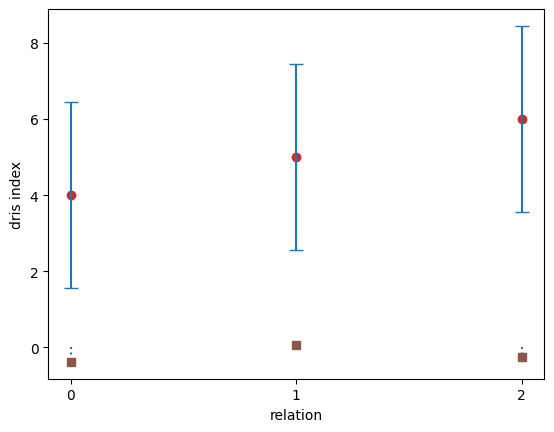

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Calculate the mean and standard deviation of each column
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

# Create a stem plot of the means with error bars
plt.stem(means, linefmt=' ', markerfmt='o', basefmt=' ', use_line_collection=False, label='Mean')
plt.errorbar(np.arange(len(means)), means, yerr=stds, fmt='none', capsize=5)

# Generate some sample data for the second set of stems (samples)
samples = np.random.randn(3, 10)
sample_means = np.mean(samples, axis=1)

# Create a stem plot of the sample means
plt.stem(sample_means, linefmt=':', markerfmt='s', basefmt=' ', use_line_collection=True, label='Sample')

# Add labels to the chart and a legend
plt.xlabel('relation')
plt.ylabel('dris index')
plt.xticks(np.arange(len(means)), nutrientes)
plt.legend()

# Display the chart
plt.show()

In [ ]:
nutrientes

['N', 'P', 'S', 'Ca', 'Mg', 'K', 'Fe', 'Mn', 'Cu', 'Zn', 'B']

<ipython-input-97-216767ff9acf>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(means, linefmt=' ', markerfmt='o', basefmt=' ', use_line_collection=False, label='Mean')
<ipython-input-97-216767ff9acf>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sample_means, linefmt=':', markerfmt='s', basefmt=' ', use_line_collection=True, label='Sample')


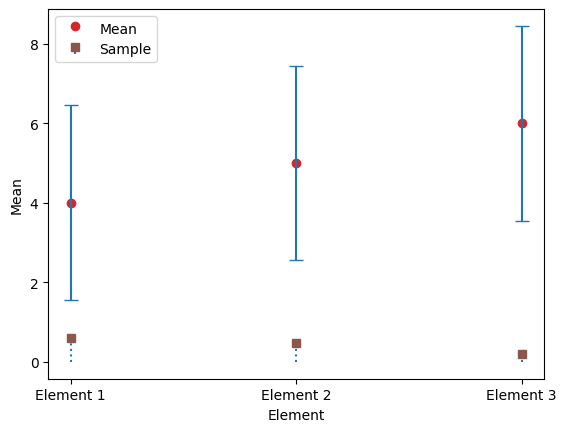

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Calculate the mean and standard deviation of each column
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

# Create a stem plot of the means with error bars
plt.stem(means, linefmt=' ', markerfmt='o', basefmt=' ', use_line_collection=False, label='Mean')
plt.errorbar(np.arange(len(means)), means, yerr=stds, fmt='none', capsize=5)

# Generate some sample data for the second set of stems (samples)
samples = np.random.randn(3, 10)
sample_means = np.mean(samples, axis=1)

# Create a stem plot of the sample means
plt.stem(sample_means, linefmt=':', markerfmt='s', basefmt=' ', use_line_collection=True, label='Sample')

# Add labels to the chart and a legend
plt.xlabel('Element')
plt.ylabel('Mean')
plt.xticks(np.arange(len(means)), ['Element 1', 'Element 2', 'Element 3'])
plt.legend()

# Display the chart
plt.show()

# prueba optimizacion

In [ ]:
matrizAuxiliarA , matrizAuxiliarB = matricesAuxiliales(df_uraba_moviles)

In [ ]:
divididoB = matrizAuxiliarA/matrizAuxiliarB
divididoA = matrizAuxiliarB/matrizAuxiliarA

In [ ]:
pd.DataFrame(matrizAuxiliarA/matrizAuxiliarB, columns = relaciones_moviles)

In [ ]:
columnasBorradas = np.linspace(0, 25 - 1, 5, dtype = np.int16) # columnas a borrar

divididoB_filtrado = np.delete(divididoB, columnasBorradas, axis = 1)
divididoA_filtrado = np.delete(divididoA, columnasBorradas, axis = 1)

In [ ]:
dataframe_divididoB = pd.DataFrame(divididoB_filtrado, columns = relaciones_moviles)
dataframe_divididoA = pd.DataFrame(divididoA_filtrado, columns = relaciones_moviles)

In [ ]:
dataframe_divididoB.head()

,N:P,N:K,N:Mg,N:S,P:N,P:K,P:Mg,P:S,K:N,K:P,K:Mg,K:S,Mg:N,Mg:P,Mg:K,Mg:S,S:N,S:P,S:K,S:Mg
0,0.089552,1.552239,0.145522,0.037313,11.166667,17.333333,1.625000,0.416667,0.644231,0.057692,0.093750,0.024038,6.871795,0.615385,10.666667,0.256410,26.800000,2.400000,41.600000,3.900000
1,0.082759,1.144828,0.141379,0.055172,12.083333,13.833333,1.708333,0.666667,0.873494,0.072289,0.123494,0.048193,7.073171,0.585366,8.097561,0.390244,18.125000,1.500000,20.750000,2.562500
2,0.087786,1.423664,0.160305,0.068702,11.391304,16.217391,1.826087,0.782609,0.702413,0.061662,0.112601,0.048257,6.238095,0.547619,8.880952,0.428571,14.555556,1.277778,20.722222,2.333333
3,0.062745,1.435294,0.149020,0.062745,15.937500,22.875000,2.375000,1.000000,0.696721,0.043716,0.103825,0.043716,6.710526,0.421053,9.631579,0.421053,15.937500,1.000000,22.875000,2.375000
4,0.090090,1.527027,0.171171,0.058559,11.100000,16.950000,1.900000,0.650000,0.654867,0.058997,0.112094,0.038348,5.842105,0.526316,8.921053,0.342105,17.076923,1.538462,26.076923,2.923077


In [ ]:
dataframe_divididoA.head()

,N:P,N:K,N:Mg,N:S,P:N,P:K,P:Mg,P:S,K:N,K:P,K:Mg,K:S,Mg:N,Mg:P,Mg:K,Mg:S,S:N,S:P,S:K,S:Mg
0,11.166667,0.644231,6.871795,26.800000,0.089552,0.057692,0.615385,2.400000,1.552239,17.333333,10.666667,41.600000,0.145522,1.625000,0.093750,3.900000,0.037313,0.416667,0.024038,0.256410
1,12.083333,0.873494,7.073171,18.125000,0.082759,0.072289,0.585366,1.500000,1.144828,13.833333,8.097561,20.750000,0.141379,1.708333,0.123494,2.562500,0.055172,0.666667,0.048193,0.390244
2,11.391304,0.702413,6.238095,14.555556,0.087786,0.061662,0.547619,1.277778,1.423664,16.217391,8.880952,20.722222,0.160305,1.826087,0.112601,2.333333,0.068702,0.782609,0.048257,0.428571
3,15.937500,0.696721,6.710526,15.937500,0.062745,0.043716,0.421053,1.000000,1.435294,22.875000,9.631579,22.875000,0.149020,2.375000,0.103825,2.375000,0.062745,1.000000,0.043716,0.421053
4,11.100000,0.654867,5.842105,17.076923,0.090090,0.058997,0.526316,1.538462,1.527027,16.950000,8.921053,26.076923,0.171171,1.900000,0.112094,2.923077,0.058559,0.650000,0.038348,0.342105


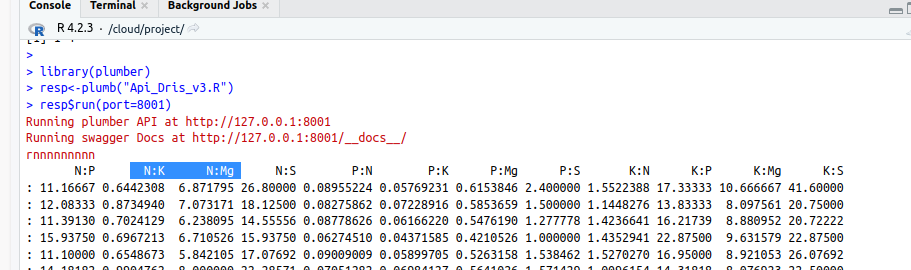

In [ ]:
indices_uraba_no_moviles = pd.DataFrame(calcularIndices(df_uraba_no_moviles, 1/df_uraba_no_moviles), columns = relaciones_no_moviles)
indices_uraba_no_moviles.head()

,Ca:Fe,Ca:Mn,Ca:Cu,Ca:Zn,Ca:B,Fe:Ca,Fe:Mn,Fe:Cu,Fe:Zn,Fe:B,...,Zn:Ca,Zn:Fe,Zn:Mn,Zn:Cu,Zn:B,B:Ca,B:Fe,B:Mn,B:Cu,B:Zn
0,0.009706,0.005238,0.141429,0.052105,0.028286,103.030303,0.539683,14.571429,5.368421,2.914286,...,19.191919,0.186275,0.100529,2.714286,0.542857,35.353535,0.343137,0.185185,5.000000,1.842105
1,0.007174,0.003204,0.073333,0.036667,0.036667,139.393939,0.446602,10.222222,5.111111,5.111111,...,27.272727,0.195652,0.087379,2.000000,1.000000,27.272727,0.195652,0.087379,2.000000,1.000000
2,0.008537,0.004895,0.077778,0.036842,0.018421,117.142857,0.573427,9.111111,4.315789,2.157895,...,27.142857,0.231707,0.132867,2.111111,0.500000,54.285714,0.463415,0.265734,4.222222,2.000000
3,0.006538,0.001028,0.072857,0.024286,0.015000,152.941176,0.157258,11.142857,3.714286,2.294118,...,41.176471,0.269231,0.042339,3.000000,0.617647,66.666667,0.435897,0.068548,4.857143,1.619048
4,0.006966,0.001512,0.077500,0.034444,0.026957,143.548387,0.217073,11.125000,4.944444,3.869565,...,29.032258,0.202247,0.043902,2.250000,0.782609,37.096774,0.258427,0.056098,2.875000,1.277778


In [ ]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])

In [ ]:
df1

,letter,number
0,a,1
1,b,2


In [ ]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])

In [ ]:
df2

,letter,number
0,c,3
1,d,4


In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df.iloc[-1:]

,letter,number
1,d,4


# considerar
https://stackoverflow.com/questions/39812059/kronecker-product-pandas-dataframes

11.16667 0.6442308  6.871795 26.80000 0.08955224 0.05769231 0.6153846 2.400000 1.5522388 17.33333 10.666667 41.60000

In [ ]:
indices_uraba_moviles.shape

(25, 20)

In [ ]:
np.kron(indices_uraba_moviles, 1/indices_uraba_moviles).shape

(9, 529)

## matriz de prueba

In [ ]:
# filas [0, 4, 8] np.linspace(0, 8, 3, dtype = np.int16)
# columnas  excluidas 0 3 np.linspace(0, 3, 2, dtype = np.int16)

In [ ]:
matriz = np.matrix([[1, 4], [2, 5], [3, 6]])
matriz

matrix([[1, 4],
        [2, 5],
        [3, 6]])

In [ ]:
calcularIndices(matriz, 1/matriz)

[0 3]


matrix([[0.25, 4.  ],
        [0.4 , 2.5 ],
        [0.5 , 2.  ]])

In [ ]:
objetivo = np.kron(matriz, matriz)[np.linspace(0, 8, 3, dtype = np.int16), :]
objetivo

matrix([[ 1,  4,  4, 16],
        [ 4, 10, 10, 25],
        [ 9, 18, 18, 36]])

In [ ]:
objetivo2 = np.delete(objetivo, np.linspace(0, 3, 2, dtype = np.int16), axis = 1)
objetivo2

matrix([[ 4,  4],
        [10, 10],
        [18, 18]])

## imagenes de prueba

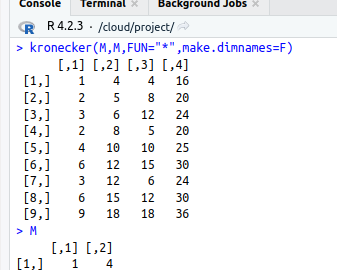

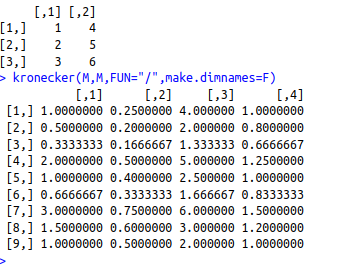

In [ ]:
import time

In [ ]:
start = time.time()

division = 1/matriz
np.kron(matriz, division)

end = time.time()
print(end - start)

0.0008890628814697266


In [ ]:
start = time.time()

print(np.kron(matriz, 1/matriz))

end = time.time()
print(end - start)

[[1.         0.25       4.         1.        ]
 [0.5        0.2        2.         0.8       ]
 [0.33333333 0.16666667 1.33333333 0.66666667]
 [2.         0.5        5.         1.25      ]
 [1.         0.4        2.5        1.        ]
 [0.66666667 0.33333333 1.66666667 0.83333333]
 [3.         0.75       6.         1.5       ]
 [1.5        0.6        3.         1.2       ]
 [1.         0.5        2.         1.        ]]
0.002104043960571289


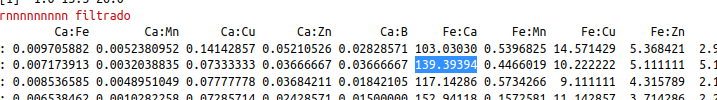

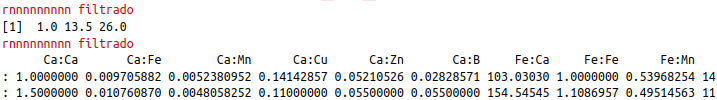